# k-Nearest Neighbors Classification on the Iris Dataset


    In this notebook, we will use the Iris dataset to demonstrate a simple k-Nearest Neighbors (kNN) 
    classification. We will go through the following steps:
    1. Load the Iris dataset.
    2. Split the dataset into training and testing sets.
    3. Normalize the feature values.
    4. Apply kNN with \( k=1 \).
    5. Evaluate and visualize the results.
    

## Step 1: Load the Iris Dataset
Load the dataset.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
from tabulate import tabulate
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Create a DataFrame with feature names and target class labels
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = [data.target_names[i] for i in y]

# Style the DataFrame
styled_df = df.style.set_caption("Iris Dataset") \
                    .background_gradient(subset=['sepal length (cm)', 'sepal width (cm)', 
                                                 'petal length (cm)', 'petal width (cm)'], cmap='viridis') \
                    .highlight_max(axis=0, color='lightcoral') \
                    .set_properties(**{'font-size': '11pt', 'border-color': 'black'}) \
                    .set_table_styles([
                        {'selector': 'th', 'props': [('font-weight', 'bold')]},
                        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '16pt')]}
                    ])

# Display the styled DataFrame (Jupyter Notebook environment)
#styled_df


## Step 2: Split the Data into Training and Testing Sets

In [2]:

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into 50% training and 50% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create DataFrames for train and test sets with target labels
train_df = pd.DataFrame(X_train, columns=data.feature_names)
train_df['target'] = [data.target_names[i] for i in y_train]

test_df = pd.DataFrame(X_test, columns=data.feature_names)
test_df['target'] = [data.target_names[i] for i in y_test]

# Pretty print the training and testing sets
print("Training Set:")
#print(tabulate(train_df, headers='keys', tablefmt='fancy_grid', showindex=False))

print("\nTesting Set:")
#print(tabulate(test_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Training Set:

Testing Set:


## Step 3: Normalize the Features

Original Data (First 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.4               3.0                4.5               1.5
1                6.2               3.4                5.4               2.3
2                5.5               2.3                4.0               1.3
3                5.4               3.9                1.7               0.4
4                5.0               2.3                3.3               1.0

Scaled Data (First 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.323529          0.444444           0.653846          0.583333
1           0.558824          0.666667           0.826923          0.916667
2           0.352941          0.055556           0.557692          0.500000
3           0.323529          0.944444           0.115385          0.125000
4           0.205882          0.055556           0.423077          0.375000


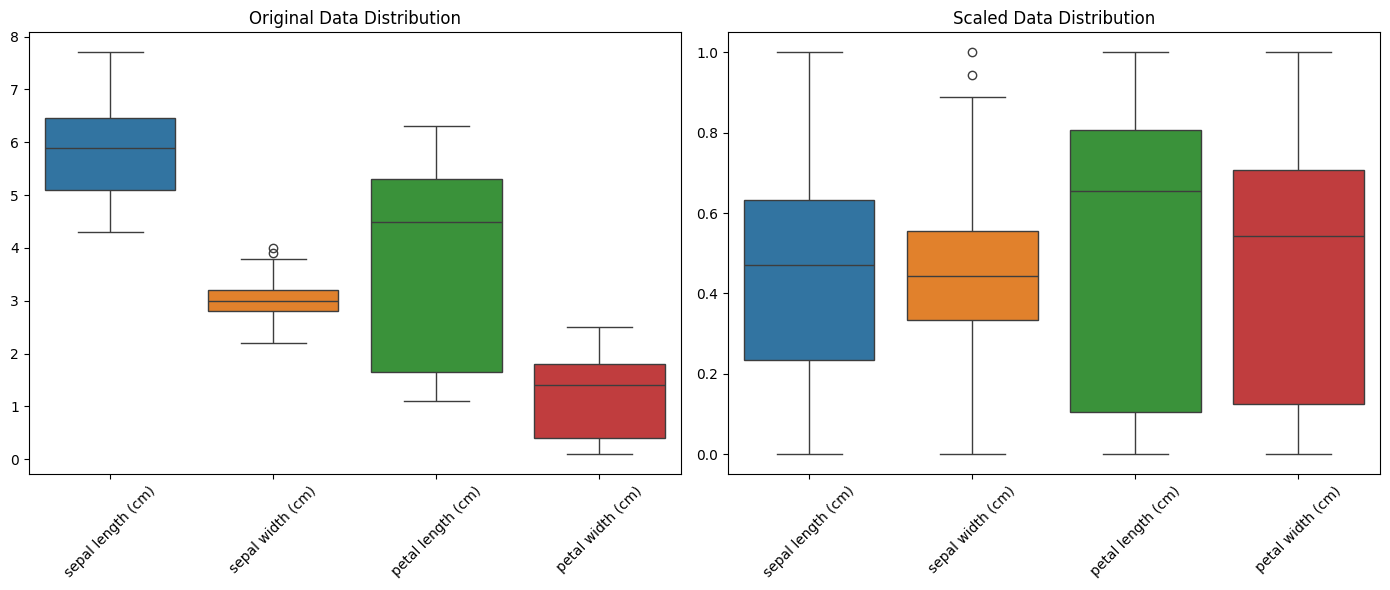

In [3]:
# Normalize the feature values to the range [0, 1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data to DataFrame for easier visualization
train_df_original = pd.DataFrame(X_train, columns=data.feature_names)
train_df_scaled = pd.DataFrame(X_train_scaled, columns=data.feature_names)

# Display the first 5 rows of both original and scaled data for comparison
print("Original Data (First 5 rows):")
print(train_df_original.head())
print("\nScaled Data (First 5 rows):")
print(train_df_scaled.head())

# Visualization to compare original vs scaled data distributions
plt.figure(figsize=(14, 6))

# Plot original data distributions
plt.subplot(1, 2, 1)
sns.boxplot(data=train_df_original)
plt.title("Original Data Distribution")
plt.xticks(rotation=45)

# Plot scaled data distributions
plt.subplot(1, 2, 2)
sns.boxplot(data=train_df_scaled)
plt.title("Scaled Data Distribution")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Explanation 

**Normalization**: `MinMaxScaler` is applied to transform features into a range of `[0, 1]`.
   - The scaler uses the minimum and maximum values of each feature in the training set to scale both the training and testing data consistently.
   - The formula used for scaling is:
     \[
     X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
     \]

 **Comparison with Box Plots**:
   - The left plot shows the original distribution of each feature.
   - The right plot shows the scaled distributions, which are now within `[0, 1]`.

### What the Plots Show:

- **Original Data Distribution**: Features have different ranges; for example, petal length and petal width vary more widely than sepal length and sepal width.

- **Scaled Data Distribution**: All features are now confined to `[0, 1]`, maintaining the relative differences within each feature without altering the shape of their distribution.

This visualization helps clarify the effect of normalization on the data. After scaling, all features are on the same scale, which is beneficial for algorithms sensitive to feature scaling, like k-Nearest Neighbors (kNN).


### Why Normalization Helps

1. **Equalizes Feature Influence**:
   - In the original data (left box plot), each feature has a different range of values. For example, "sepal length" ranges approximately from 4 to 7, while "petal width" ranges only from about 0 to 2. This means that, without normalization, features with larger ranges could dominate the model's decisions, overshadowing features with smaller ranges.
   - After normalization (right box plot), all features are rescaled to the same range \([0, 1]\). This ensures that each feature contributes equally to the model, preventing larger-scale features from having an undue influence.

2. **Improves Model Performance**:
   - Many machine learning algorithms rely on the distance between data points. When features are on different scales, the calculated distance can be distorted, which can negatively impact the model's performance.
   - For example, in k-Nearest Neighbors, the distance to each neighbor is essential for classification. If features are not normalized, a feature with a large scale could dominate the distance calculation, leading to biased results. Normalization ensures that all features are treated equally in terms of distance calculations.

3. **Makes Training Faster**:
   - When features are normalized, models can converge faster during training. Normalized data often leads to a smoother and more stable optimization process, as each feature has comparable ranges and gradients are better balanced. This can result in shorter training times and improved convergence, particularly for gradient-based models.

### Why Normalized Data is Easier to Interpret
The normalized box plot (right side) shows that all features now lie within the same range, making it visually easier to compare distributions across different features. While the original plot shows raw values, the normalized plot reveals the relative distributions of each feature on a consistent scale. This makes it clear if a feature has a wider range within \([0, 1]\) and highlights any outliers.

### Summary
Normalization enhances:
- **Model accuracy** by balancing feature influence.
- **Training speed** by smoothing the optimization landscape.
- **Interpretability** by rescaling features to a comparable range, making the data more consistent and easier to visualize.

This step is particularly valuable when features vary in scale, as seen in your original box plot. With normalization, all features are now evenly scaled, which generally leads to more balanced and effective modeling.


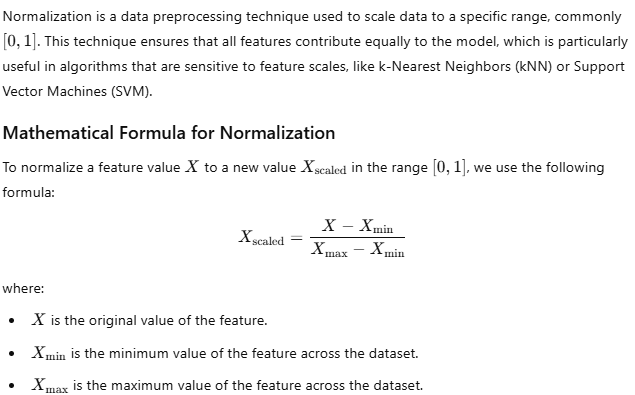

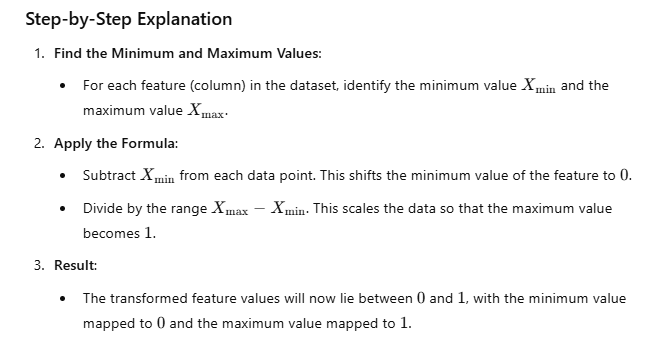

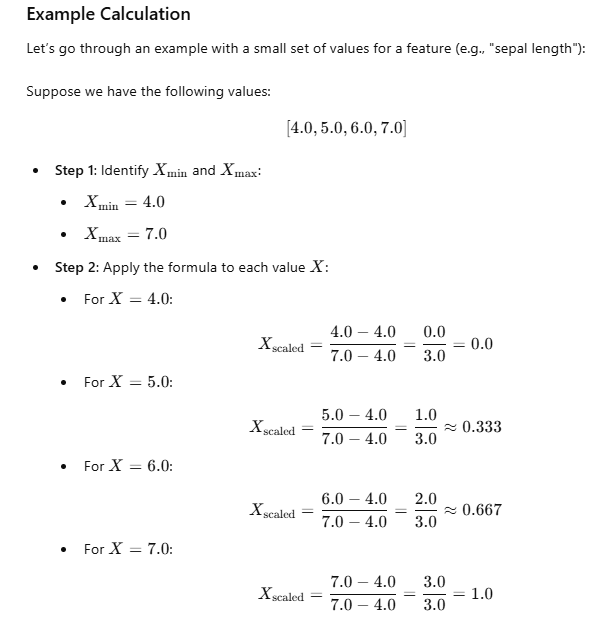

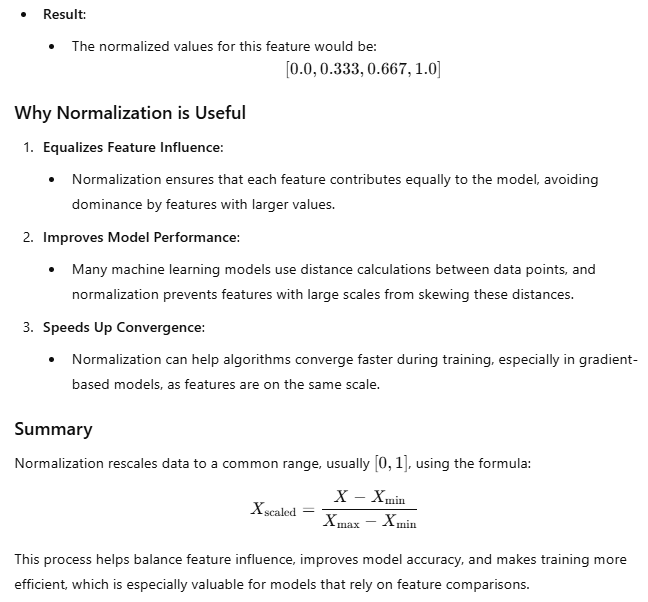

## Step 4: Train the k-Nearest Neighbors Classifier

Training accuracy with k=1: 0.9733333333333334


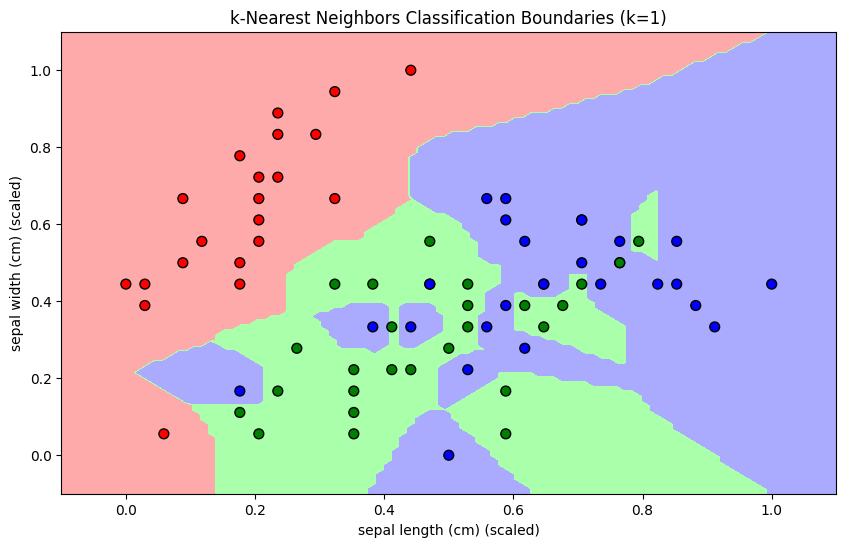

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Use only two features for 2D visualization
X = X[:, :2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Normalize the feature values to the range [0, 1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the kNN classifier with k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

# Check training accuracy
training_accuracy = knn.score(X_train_scaled, y_train)
print("Training accuracy with k=1:", training_accuracy)

# Visualize the decision boundaries
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

# Create a mesh to plot decision boundaries
x_min, x_max = X_train_scaled[:, 0].min() - 0.1, X_train_scaled[:, 0].max() + 0.1
y_min, y_max = X_train_scaled[:, 1].min() - 0.1, X_train_scaled[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=ListedColormap(cmap_bold), edgecolor='k', s=50)
plt.title("k-Nearest Neighbors Classification Boundaries (k=1)")
plt.xlabel(data.feature_names[0] + " (scaled)")
plt.ylabel(data.feature_names[1] + " (scaled)")
plt.show()


This plot shows the decision boundaries created by a k-Nearest Neighbors (kNN) classifier with \( k=1 \) on a subset of the Iris dataset using only two features: sepal length and sepal width. Each point represents a training sample, and the background colors represent the regions where the classifier would assign new points based on the nearest neighbor rule.

### Explanation of Plot Components

1. **Data Points**:
   - Each dot represents a data point in the training set.
   - Different colors of the dots represent different classes:
     - **Red dots**: One class of the Iris dataset (e.g., Iris-setosa).
     - **Green dots**: Another class (e.g., Iris-versicolor).
     - **Blue dots**: The third class (e.g., Iris-virginica).
   - Each point has a black edge, making it easy to differentiate between data points and background colors.

2. **Decision Regions**:
   - The background is divided into colored regions, each representing the area classified as one of the three classes by the kNN classifier.
   - The **pink region** is where any new point would be classified as the red class, the **green region** for the green class, and the **blue region** for the blue class.
   - The jagged boundaries reflect that each region's shape is determined by the position of individual points in the training set. This is especially pronounced with \( k=1 \), as each new point is classified based on the single closest training point.

3. **Random Spots and Irregular Boundaries**:
   - The irregular boundaries and small "islands" or "pockets" of color within larger regions are due to the use of \( k=1 \).
   - With \( k=1 \), each training point strictly defines the classification of the surrounding space, resulting in regions that can be heavily influenced by individual points. For example, a green "island" in a predominantly blue area indicates that a green point is close enough to that area to override the surrounding blue classification.

### Interpretation

- **Local Influence and Overfitting**:
   - Because \( k=1 \) only considers the single nearest neighbor, the classifier perfectly matches the training data, but this can lead to **overfitting**. The model is highly sensitive to individual points and minor variations in the training data, which is why there are small, irregular regions or "islands" where one class appears within a larger area dominated by another class.
   - This behavior indicates that the classifier might not generalize well to new data, as it’s overly influenced by specific training points.

- **Effect of Choosing \( k=1 \)**:
   - The choice of \( k=1 \) causes the decision boundaries to be highly complex and closely follow the training data. Higher values of \( k \) (e.g., 3 or 5) would smooth these boundaries, as the classification would then be based on the majority class of the nearest neighbors, reducing the impact of individual points.

- **Regions and Boundaries**:
   - The boundaries between classes are determined by where one class becomes closer than another. In kNN, these boundaries are not linear but instead depend on the distribution and density of the training data points. 
   - With more training points of each class, the classifier would produce smoother and more defined boundaries.

### Summary

This plot provides a visual representation of how a kNN classifier with \( k=1 \) partitions the feature space:
- Each training point has a localized influence, leading to jagged boundaries and isolated regions ("islands") of classification.
- The irregularity of the boundaries indicates that this model is likely overfitting, as it adheres closely to the training data.
- Higher values of \( k \) would lead to smoother boundaries, reducing the overfitting effect by taking into account more neighboring points. 

This plot helps illustrate the trade-offs of using a small \( k \) in kNN: while it may provide high accuracy on training data, it can also create complex boundaries that may not generalize well to new data.


### Explanation of Each Step


**Training the kNN Classifier**:
   - A kNN classifier with \( k=1 \) is initialized and trained on the normalized training data. With \( k=1 \), the model assigns each point to the class of its single nearest neighbor, making it highly sensitive to the training data.

**Training Accuracy**:
   - The accuracy of the classifier on the training data is printed. With \( k=1 \), the model often achieves high accuracy on training data due to overfitting, as each point is assigned based on its nearest neighbor.

**Decision Boundary Visualization**:
   - **Mesh Grid Creation**: A grid of points is created over the range of feature values to map the decision boundaries.
   - **Predicting Over the Grid**: The model predicts the class for each point in the grid. This is used to color the regions of the plot based on the predicted class.
   - **Contour Plot**: `contourf` is used to fill in the decision regions, where each color represents a predicted class (setosa, versicolor, or virginica).
   - **Plotting Training Points**: The training points are overlaid on the plot, with colors corresponding to their actual classes. This shows where the training data falls within the decision boundaries.

### Interpretation of the Output Plot

- **Decision Boundaries**:
   - The background colors represent the decision regions for each class as predicted by the kNN classifier.
   - Each region corresponds to the class that any point within it would be assigned to if it were a new, unclassified point.

- **Training Points**:
   - The points represent the actual training samples, with each color corresponding to a class (`setosa`, `versicolor`, `virginica`). These points have a black edge for better visibility.
   - Since \( k=1 \), each point is classified based solely on the closest training point, resulting in sharp, jagged boundaries. This often leads to small pockets of one class within another, as each decision is local.

- **Contour and Regions**:
   - The contour plot illustrates how the model classifies the 2D feature space. Points near the decision boundaries are closer to points of other classes, so small changes in feature values could change the classification.
   - Regions of the same color represent areas that the model predicts as belonging to the same class. These boundaries may look irregular, especially with \( k=1 \), which is sensitive to individual points.

### Key Takeaways

- **Sensitivity of \( k=1 \)**:
   - Using \( k=1 \) makes the classifier very sensitive to noise and specific placements of data points, which can lead to overfitting. The model perfectly fits the training data but may generalize poorly to new data.
   - In practice, choosing a larger \( k \) (e.g., 3 or 5) often smooths the boundaries and improves generalization.

- **Importance of Normalization**:
   - Without normalization, features with larger scales would dominate distance calculations, skewing the decision boundaries. Normalization ensures that both features contribute equally.

- **Visual Understanding**:
   - The plot provides a visual understanding of how kNN with \( k=1 \) partitions the feature space based on proximity. Each region indicates the likely class of any new point within that area, helping us understand how the classifier would categorize unseen data.

This visualization and explanation demonstrate how kNN classifies data and shows the effect of setting \( k=1 \), emphasizing the importance of choosing \( k \) and normalizing data for effective classification.


### Explanation of Each Step

1. **k-Nearest Neighbors (kNN) Classifier**:
   - The kNN algorithm is a simple, instance-based learning method.
   - It works by finding the \( k \) nearest data points in the feature space and assigning a class based on the majority label of those neighbors.
   - Here, we set \( k=1 \), meaning the classifier will assign the class of the single nearest neighbor to any new data point.

2. **Training the Model**:
   - Using `fit()`, we train the kNN model on the scaled training data.
   - This model "learns" by storing the training samples so it can compare them with any new data it encounters.

3. **Checking Accuracy**:
   - After training, we check the accuracy of the model on the training data.
   - Since \( k=1 \) can lead to overfitting, it’s common for the model to achieve high accuracy on the training data.

### Explanation of the Visualization

- **Decision Boundaries**: The background colors represent regions classified as one of the three classes (`setosa`, `versicolor`, or `virginica`). Each region is defined by the nearest neighbor rule for \( k=1 \).

- **Training Points**: The colored points are the training samples, with colors matching the respective class regions.

- **Interpretation**:
   - This plot shows how the kNN classifier with \( k=1 \) creates distinct regions for each class based on training data.
   - Since each point is classified by its nearest neighbor, the boundaries are often jagged, especially with small \( k \) values, which can lead to overfitting.

This visualization helps illustrate how the kNN model with \( k=1 \) classifies the training data and how it creates decision boundaries based on proximity to the nearest neighbor.


## Step 5: Make Predictions and Evaluate the Model

In [5]:

from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Display the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))
    

Accuracy on test set: 0.72

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.56      0.43      0.49        23
   virginica       0.54      0.65      0.59        23

    accuracy                           0.72        75
   macro avg       0.70      0.70      0.69        75
weighted avg       0.72      0.72      0.72        75



## Step 6: Visualize the Results

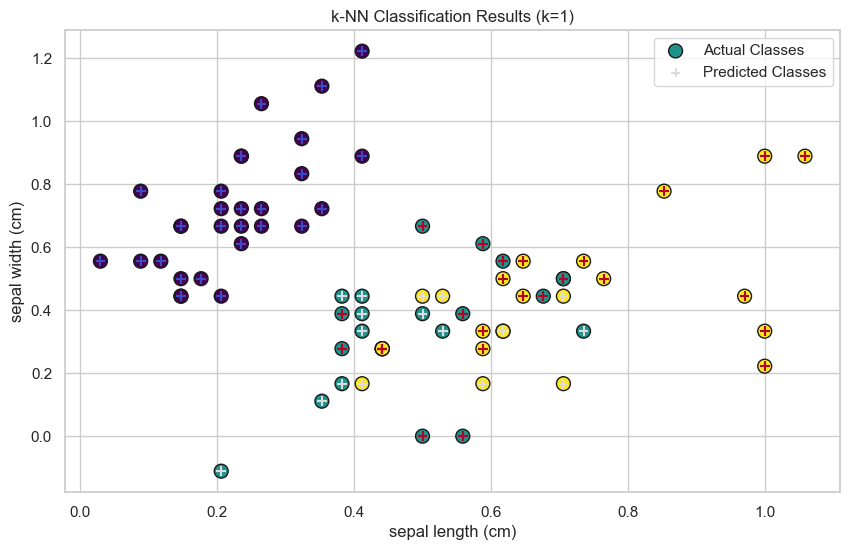

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for visualizations
sns.set(style="whitegrid")

# Plotting a scatter plot for two features (first two features for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, label="Actual", cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, marker='+', cmap='coolwarm', s=50, label="Predicted")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(["Actual Classes", "Predicted Classes"])
plt.title("k-NN Classification Results (k=1)")
plt.show()
    

### Interpretation of the Plot

#### Matching Points:
- Where the circles (actual labels) and plus signs (predicted labels) overlap or are close together, it indicates that the model correctly predicted the class.
- Points with matching actual and predicted labels will have a single color, meaning the model made correct predictions for these points.

#### Mismatched Points:
- If you see a circle and a plus sign of different colors at the same location, it means the classifier incorrectly predicted the class for that point.
- The difference in colors highlights the misclassifications, allowing you to see where the model struggled.

#### Visual Representation of Class Boundaries:
- Although the plot does not explicitly show decision boundaries, it gives a sense of where classes are located in feature space.
- Clusters of the same color indicate areas where certain classes dominate, and if there are isolated mismatched points, it might indicate noisy or difficult-to-classify data points.

### Summary
This plot provides a side-by-side comparison of the **actual** vs. **predicted** labels for each point in the test set. By examining overlapping points, you can visually assess the model's accuracy:

- Overlapping colors suggest correct classifications.
- Mismatched colors indicate errors, showing where the model's predictions diverged from the actual labels.



    ## Conclusion
    We successfully applied a k-Nearest Neighbors classifier to the Iris dataset, using 50% of the data for 
    training and 50% for testing. We also visualized the classification results by comparing actual and 
    predicted labels.

    The kNN algorithm with \( k=1 \) performed reasonably well, demonstrating its effectiveness on simple 
    classification tasks with small datasets like Iris.
    

An accuracy of 70-90% is often considered ideal for machine learning models, especially in practical applications, because it usually strikes a balance between good performance and realistic expectations. Here’s why this range is generally favorable:

### 1. **Avoiding Overfitting**
   - If a model achieves extremely high accuracy (close to 100%) on a training or test set, it could be a sign of **overfitting**. Overfitting occurs when the model learns patterns specific to the training data, including noise and minor fluctuations, rather than generalizing to unseen data.
   - Models with 70-90% accuracy often strike a balance between capturing important patterns in the data and maintaining the flexibility to generalize well to new data.

### 2. **Realistic Expectations for Real-World Data**
   - In real-world applications, data is often noisy, incomplete, and not perfectly predictable. For many problems, achieving close to 100% accuracy is not only difficult but also unrealistic because the data may contain inherent uncertainty or randomness.
   - A 70-90% accuracy range typically reflects a well-trained model that performs reliably, but it’s not overfitted or “overconfident.”

### 3. **Cost and Complexity of Improvement**
   - Improving accuracy beyond 90% often requires significantly more resources, time, and complex techniques, sometimes with diminishing returns. Moving from 70% to 80% may be feasible, but improving from 90% to 95% could require substantial additional data, complex models, or feature engineering, which may not be cost-effective.
   - For many applications, the effort needed to push accuracy closer to 100% is not justified by the additional benefits, especially if the marginal gains do not significantly impact the outcome.

### 4. **Use Case-Specific Requirements**
   - In some applications (like medical diagnoses or autonomous driving), very high accuracy might be critical because errors have serious consequences. In other areas, like product recommendations or social media algorithms, some inaccuracy is acceptable.
   - A 70-90% range is ideal for many use cases where high reliability is required, but absolute perfection isn’t necessary. It often provides a “good enough” solution that serves most practical needs without excessive costs.

### 5. **Tolerance for Model Errors**
   - In many applications, a few errors can be tolerated, especially if they don’t significantly impact the user experience or outcome. A model with 80% accuracy, for instance, may still provide value if errors are either rare or non-critical.
   - Users and businesses may be willing to accept some degree of inaccuracy if the model provides insights, saves time, or automates tasks effectively.

### 6. **Balance Between Precision and Complexity**
   - Models that achieve 70-90% accuracy are often simpler and easier to interpret than those that reach very high accuracy. This range allows for models that are performant but not overly complex or resource-intensive, making them more feasible for deployment and maintenance.
   - Aiming for this accuracy range encourages practical solutions that are interpretable, scalable, and suitable for production environments.

### Summary
The 70-90% accuracy range is often ideal because it suggests a well-generalized model that avoids overfitting, is realistically achievable for many types of data, balances performance with complexity, and provides reliable results for many practical applications. However, the exact target accuracy depends on the specific context and requirements of the use case.
